# **Decision Tree Classifier**

Documentation Sci-kit Learn sur les decision trees : https://scikit-learn.org/stable/modules/tree.html

# Arbres de Décision (DT)

Les arbres de décision (DTs) sont une méthode d'apprentissage supervisé utilisée pour la classification et la régression. L'objectif est de créer un modèle qui prédit la valeur d'une variable cible en apprenant des règles de décision simples à partir des caractéristiques des données.

Par exemple, les arbres de décision peuvent apprendre à partir des données pour approximer une courbe sinusoïdale à l'aide d'un ensemble de règles conditionnelles (si-alors-sinon). Plus l'arbre est profond, plus les règles de décision sont complexes et plus le modèle est ajusté.

![Decision Tree](https://scikit-learn.org/stable/_images/iris.svg)

# 1. Importer les librairies

In [1]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
import matplotlib.pyplot as plt # visualisation des données
import numpy as np # algèbre linéaire
import pandas as pd  # traitement des données (ex: lecture de fichiers CSV)
import seaborn as sns # visualisation des données
import sklearn # apprentissage automatique

# 2. Importer le jeu de données

In [2]:
# importer le jeu de données iris avec sklearn
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

## Pour référence, voici des images des trois espèces de fleurs :

![https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

# 3. Jeu de données vers DataFrame Pandas
Pandas Documentation : https://pandas.pydata.org/docs/reference/frame.html

In [3]:
# Mettre iris dans un dataframe pandas avec la variable cible (que nous essaierons de prédire) comme dernière colonne
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

In [4]:
# Les 10 premières valeurs du jeu de données
display(df_iris.head(10))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# 4. Analyse exploratoire des données

In [5]:
# Forme du jeu de données (nb de lignes et de colonnes)
print(df_iris.shape)

# Nom des colonnes
print(df_iris.columns)

(150, 5)
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


In [6]:
#Afficher les informations sur le DataFrame du jeu de données
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [27]:
# Description du jeu de données Iris (moyenne, écart-type, min, max, quartiles)
display(df_iris.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Distribution de fréquence des valeurs dans les variables catégorielles

In [8]:
# Noms des valeurs cibles
print(iris.target_names, "\n")

# Nombre pour chaque valeur cible
print(df_iris['target'].value_counts(), "\n")

# Comme ci-dessus mais en pourcentage
print(df_iris['target'].value_counts(normalize=True), "\n")

['setosa' 'versicolor' 'virginica'] 

target
0    50
1    50
2    50
Name: count, dtype: int64 

target
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64 



Nous pouvons voir que le jeu de données est équilibré en termes de classes.

### Valeurs manquantes dans les variables

In [9]:
print(df_iris.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


## Corrélation entre les variables

In [10]:
# Matrice de corrélation entre toutes les caractéristiques
df_iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


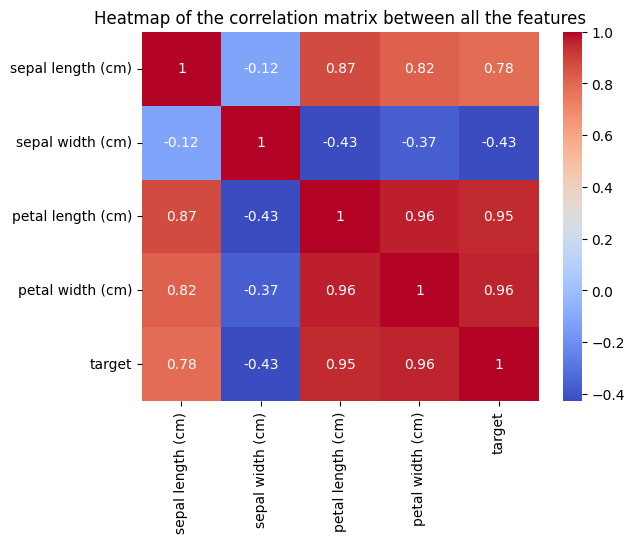

In [28]:
# Heatmap de la matrice de corrélation utilisant seaborn 
plt.title("Heatmap of the correlation matrix between all the features")
sns.heatmap(df_iris.corr(), annot=True, cmap='coolwarm') # annot = True to print the values inside the square
plt.show()

In [12]:
# print the most correlated features with the target variable (absolute value)
print(df_iris.corr()['target'].abs().sort_values(ascending=False))

target               1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)     0.426658
Name: target, dtype: float64


### Visualisation des données

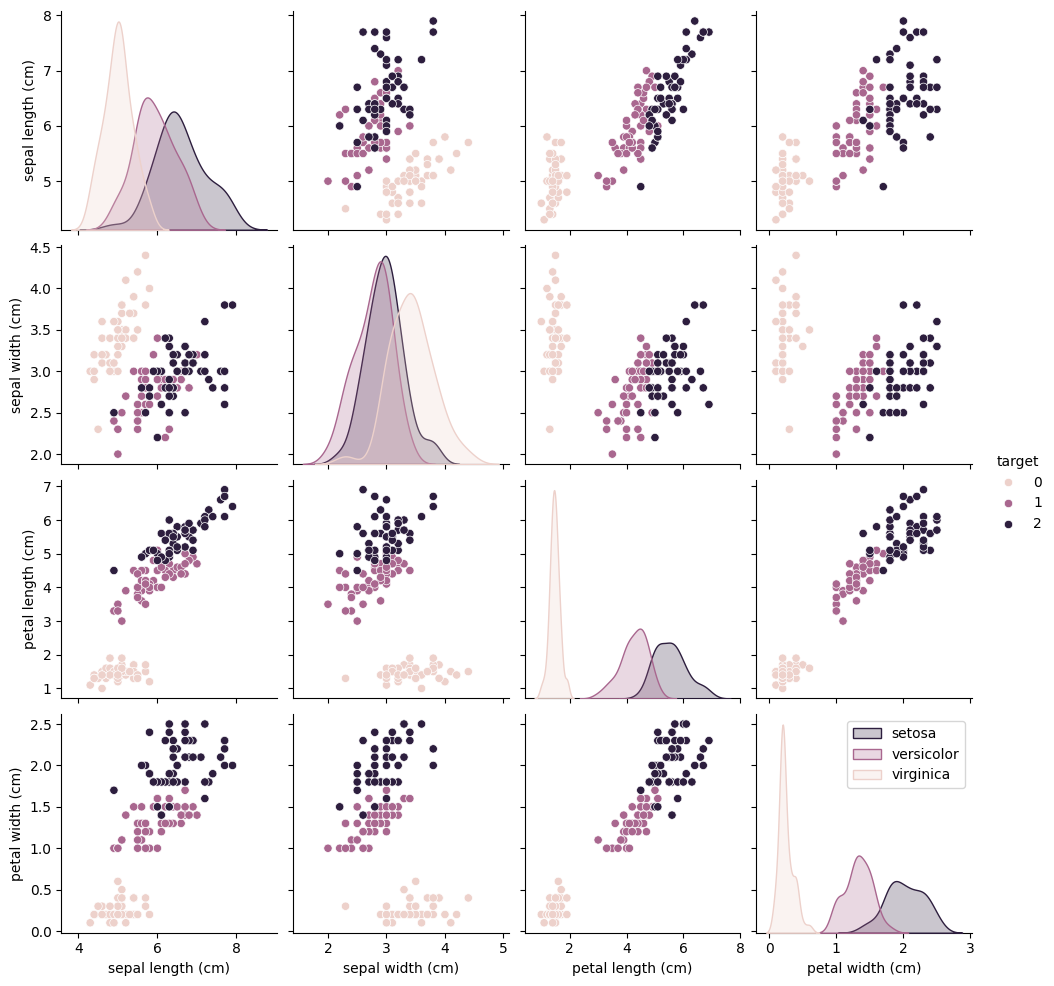

In [13]:
# Tracer les relations par paires dans le dataset iris
sns.pairplot(df_iris, hue='target', height=2.5)
plt.legend(iris.target_names)
plt.show()

# 5. Déclarer le vecteur de caractéristiques et la variable cible

In [14]:
# X est l'ensemble des caractéristiques et y est la variable cible
X = df_iris.drop(['target'], axis=1)

y = df_iris['target']

# 6. Diviser les données en ensembles d'entraînement et de test séparés

In [15]:
# Utiliser sklearn.model_selection 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [16]:
# Vérifier les dimensions de chaque sous-ensemble
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(100, 4) (50, 4)
(100,) (50,)


In [17]:
# Compter les valeurs uniques dans chacun des sous-ensembles
print(y_train.value_counts())  
print(y_test.value_counts())  

target
1    35
2    34
0    31
Name: count, dtype: int64
target
0    19
2    16
1    15
Name: count, dtype: int64


# 7. Ingénierie des fonctionnalités - Encodage des données

**L'ingénierie des fonctionnalités** est le processus de transformation des données brutes en fonctionnalités utiles qui nous aident à mieux comprendre notre modèle et à augmenter sa puissance prédictive.

In [18]:
# vérifier les types de données dans X_train
X_train.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

Data is already ready to be used for model training. <br>
This wouldn't have been the case if the data weren't numerical.

![Gini](https://cdn.statcdn.com/Infographic/images/normal/33270.jpeg)

# 8. Classifieur Arbre de Décision avec le critère indice de Gini

---

In [19]:
# instancier le modèle DecisionTreeClassifier avec le critère indice de Gini
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# ajuster le modèle (entraîner le modèle) sur X_train
clf_gini.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Prédire les résultats de l'ensemble de test avec le critère d'indice Gini

In [20]:
y_pred_gini = clf_gini.predict(X_test)

### Vérifier le score de précision avec le critère d'indice Gini en utilisant sklearn.metrics

In [21]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9800


Ici, **y_test** sont les vraies étiquettes de classe et **y_pred_gini** sont les étiquettes de classe prédites dans l'ensemble de test.

In [22]:
# Afficher les 25 premières réponses vraies et prédites
print('True:', y_test.values[0:25])
print('Pred:', y_pred_gini[0:25])

True: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2]
Pred: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2]


### Vérifier le surapprentissage et le sous-apprentissage

In [23]:
#comparer les précisions d'entraînement et de test 
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9700
Test set score: 0.9800


Ici, le score de précision de l'ensemble d'entraînement est de 0,97 alors que celui de l'ensemble de test est de 0,98. Ces deux valeurs sont assez comparables. Il n'y a donc aucun signe de surapprentissage. 


In [24]:
acc_train, acc_test = [], []
for i in range(1,20):
  clf_gini_i = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=0)
  clf_gini_i.fit(X_train, y_train)
  acc_train.append(clf_gini_i.score(X_train, y_train))
  
  acc_test.append(clf_gini_i.score(X_test, y_test))
pd.DataFrame(data=[acc_train,acc_test], index=['train acc','test acc'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
train acc,0.66,0.95,0.97,0.98,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test acc,0.68,0.98,0.98,0.98,0.98,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96


Nous pouvons voir qu'à partir de max_depth > 4, nous rencontrons un problème de surapprentissage

### Visualisation de l'arbre de décision

[Text(0.375, 0.875, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.125, 0.125, 'gini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.062\nsamples = 31\nvalue = [0, 1, 30]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

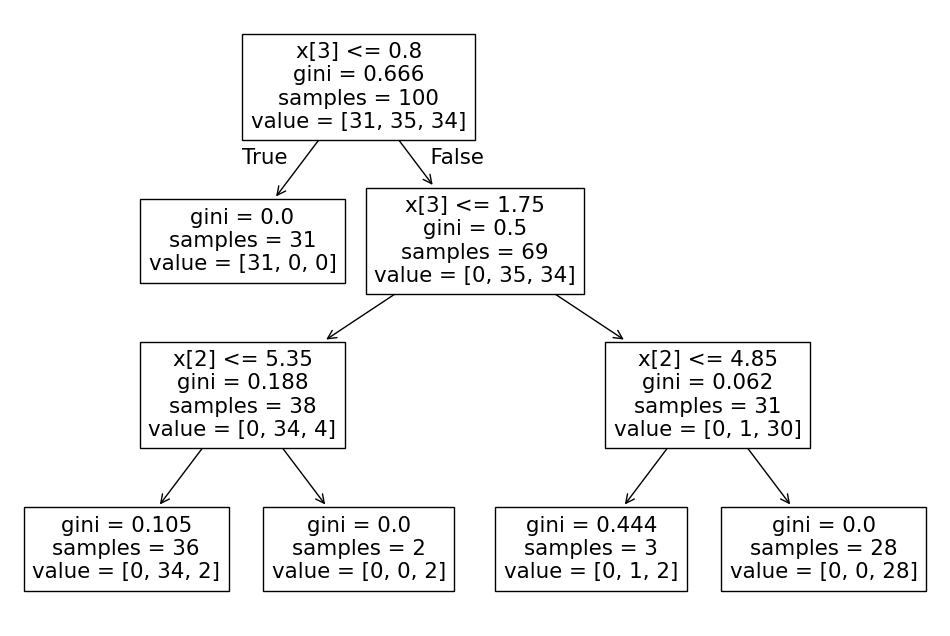

In [25]:
plt.figure(figsize=(12,8))


tree.plot_tree(clf_gini.fit(X_train, y_train)) 

### Visualiser les arbres de décision avec graphviz

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


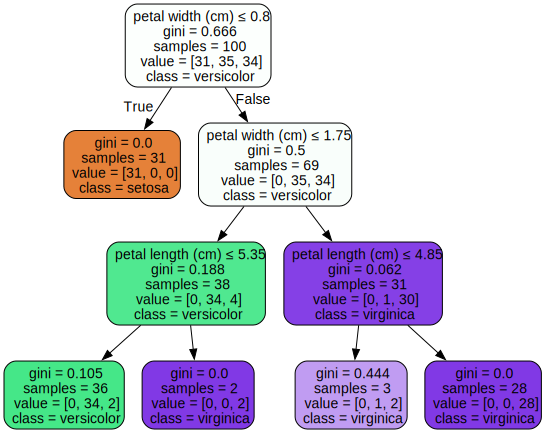

In [32]:
print(X_train.columns)
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

# 9. Classifieur Arbre de Décision avec le critère entropie

---



In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# ajuster le modèle
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Prédire les résultats de l'ensemble de test avec le critère d'entropie

In [ ]:
y_pred_en = clf_en.predict(X_test)

### Vérifier les scores de précision avec le critère d'entropie

In [ ]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9800


### Vérifier le surapprentissage et le sous-apprentissage

In [ ]:
# comparer les précisions d'entraînement et de test 
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9700
Test set score: 0.9800


Nous pouvons voir que le score de l'ensemble d'entraînement et le score de l'ensemble de test sont les mêmes que ci-dessus. Ces deux valeurs sont assez comparables. Il n'y a donc aucun signe de surapprentissage. 


In [ ]:
acc_train, acc_test = [], []
for i in range(1,20):
  clf_en_i = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0)
  clf_en_i.fit(X_train, y_train)
  acc_train.append(clf_en_i.score(X_train, y_train))
  
  acc_test.append(clf_en_i.score(X_test, y_test))
pd.DataFrame(data=[acc_train,acc_test], index=['train acc','test acc'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
train acc,0.66,0.95,0.97,0.98,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test acc,0.68,0.98,0.98,0.98,0.96,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98


Nous pouvons voir qu'à partir de max_depth > 5, nous rencontrons un problème de surapprentissage

### Visualiser l'arbre de décision

[Text(0.375, 0.875, 'x[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.125, 0.125, 'entropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\nentropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]'),
 Text(0.625, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

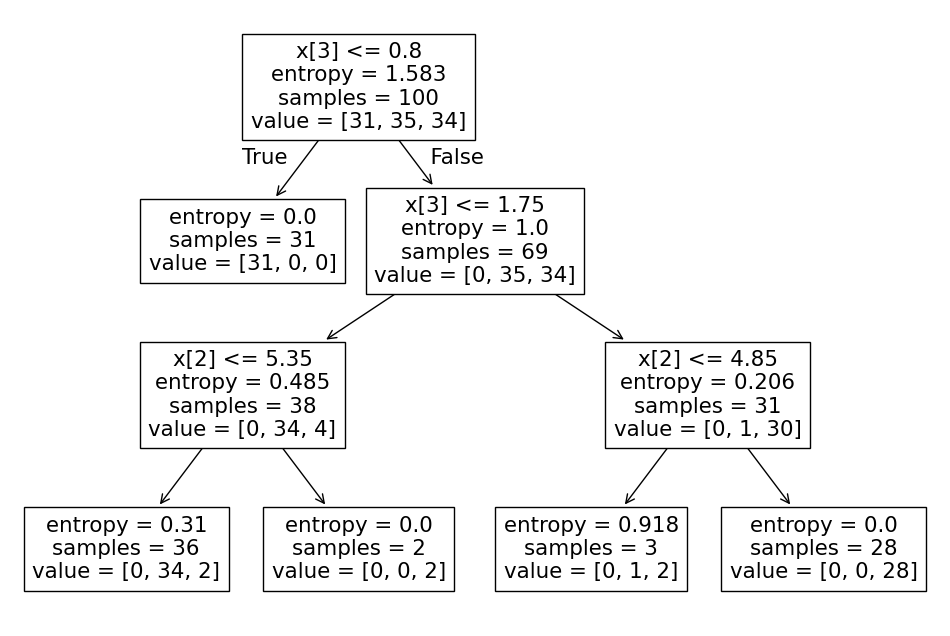

In [ ]:
plt.figure(figsize=(12,8))


tree.plot_tree(clf_en.fit(X_train, y_train)) 

### Visualiser l'arbre de décision avec graphviz

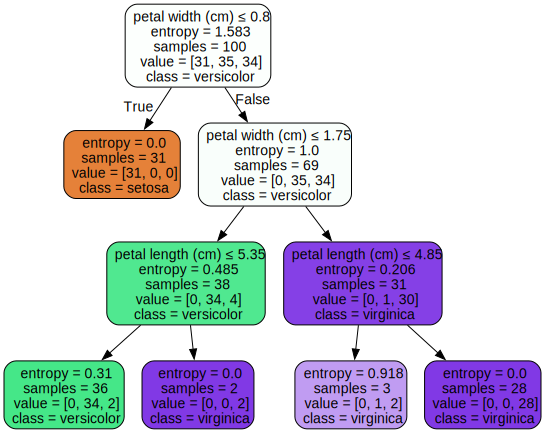

In [ ]:
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=iris.feature_names,  
                              class_names=iris.target_names,
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph

Based on the above analysis we can say that our classification model has a very good accuracy. The model is doing a very good job in terms of predicting the class labels. <br>
But, this analysis does not give the underlying distribution of values.

Using confusion matrices help give insight into the type of errors the model is making.

# 10. Matrice de confusion


A confusion matrix helps summarize the performance of a classification algorithm. A confusion matrix will give a clear picture of the perfomance of a classification model as well as the types of errors produced by the it. <br>
It gives a summary of correct and incorrect predictions broken down by each category. 


Four types of outcomes are possible while evaluating a classification model performance :


**True Positives (TP)** – We predict that an observation belongs to a certain class *x* and the observation actually belongs to that class *x*.


**True Negatives (TN)** – We predict that an observation does not belong to a certain class *x* and the observation actually does not belong to that class *x*.


**False Positives (FP)** – We predict that an observation belongs to a certain class *x* but the observation actually **does not belong** to that class *x*. This type of error is called Type I error.



**False Negatives (FN)** – We predict that an observation does not belong to a certain class *x* but the observation **actually belongs** to that class *x*. This is a very serious error and it is called Type II error.



Confusion Matrice for GINI:


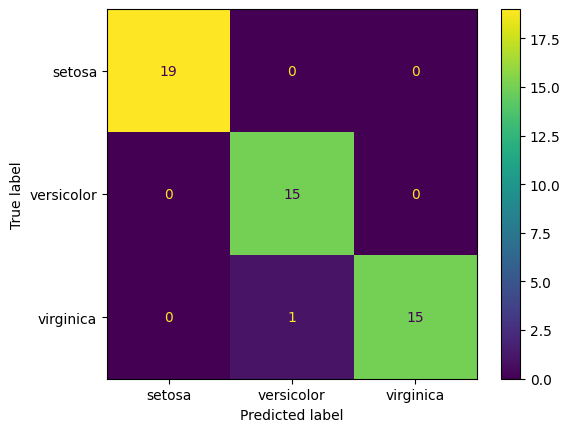

In [ ]:
# Afficher la matrice de confusion pour GINI et identifier les quatre parties
# Utiliser sklearn.metrics


# Matrice de Confusion pour GINI
print("Confusion Matrice for GINI:")
cm = confusion_matrix(y_test, y_pred_gini)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.show()

Confusion Matrix for Entropy:


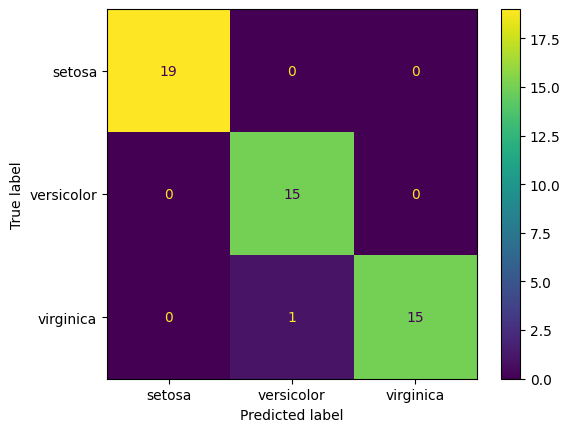

In [ ]:
# Afficher la matrice de confusion pour l'Entropie et identifier les quatre parties

print("Confusion Matrix for Entropy:")
cm = confusion_matrix(y_test, y_pred_en)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.show()

# 11. Validation Croisée

In [ ]:
# Score de validation croisée pour GINI avec 10 découpages différents
scores_gini = cross_val_score(clf_gini, X, y, cv=10)
print("Cross-validation scores for GINI: {}".format(scores_gini))
print("Mean cross-validation score: {:.2f}".format(scores_gini.mean()))
print("Standard deviation of cross-validation score: {:.2f}".format(scores_gini.std()))

# Score de validation croisée pour l'Entropie avec 10 découpages différents
scores_en = cross_val_score(clf_en, X, y, cv=10)
print("\n\nCross-validation scores for Entropy: {}".format(scores_en))
print("Mean cross-validation score: {:.2f}".format(scores_en.mean()))
print("Standard deviation of cross-validation score: {:.2f}".format(scores_en.std()))


Cross-validation scores for GINI: [1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 1.         1.        ]
Mean cross-validation score: 0.96
Standard deviation of cross-validation score: 0.03


Cross-validation scores for Entropy: [1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 1.         1.        ]
Mean cross-validation score: 0.96
Standard deviation of cross-validation score: 0.03


# 12. Rapport de classification

**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.



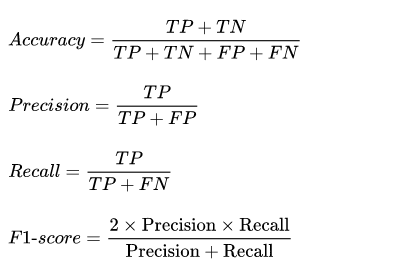

In [ ]:
# Rapport de classification pour GINI
print(classification_report(y_test, y_pred_gini, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [ ]:
# Rapport de classification pour l'Entropie
print(classification_report(y_test, y_pred_en, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# 13. Frontières de décision

Les deux caractéristiques les plus corrélées pour la classification sont la longueur et la largeur des pétales, tandis que les deux caractéristiques les moins corrélées sont la longueur et la largeur des sépales.

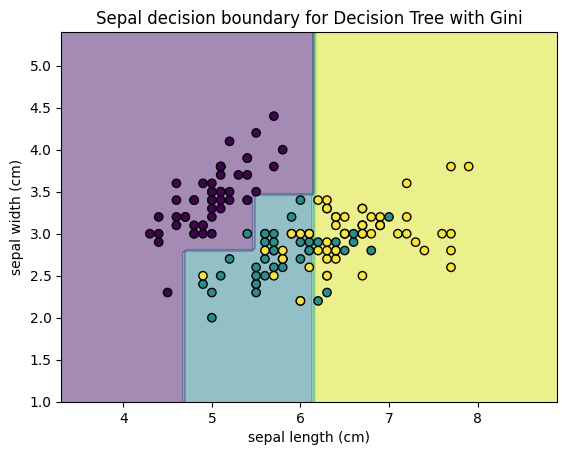

In [ ]:
# Afficher la frontière de décision pour l'arbre de décision avec l'indice de Gini
#import sklearn.inspection

# Frontière de décision uniquement pour la longueur et la largeur des sépales
X = iris.data[:, :2]
sepal_classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
sepal_classifier.fit(X, iris.target)

disp = sklearn.inspection.DecisionBoundaryDisplay.from_estimator(sepal_classifier, X, xlabel=iris.feature_names[0],
                                              ylabel=iris.feature_names[1], alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
plt.title("Sepal decision boundary for Decision Tree with Gini")
plt.show()

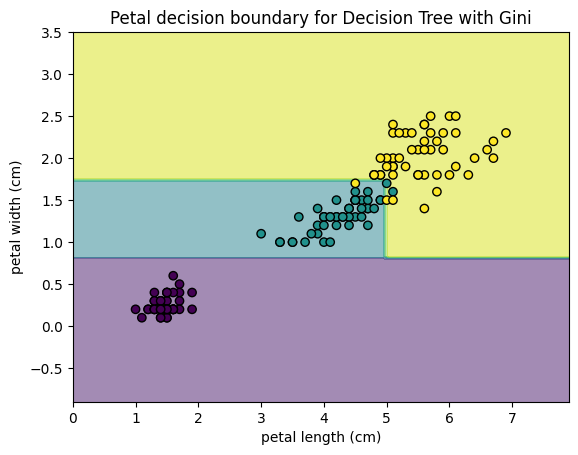

In [ ]:
# Frontière de décision uniquement pour la longueur et la largeur des pétales
X = iris.data[:, 2:]
petal_classifier = DecisionTreeClassifier(
    criterion='gini', max_depth=3, random_state=0)
petal_classifier.fit(X, iris.target)

disp = DecisionBoundaryDisplay.from_estimator(petal_classifier, X, xlabel=iris.feature_names[2],
                                              ylabel=iris.feature_names[3], alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
plt.title("Petal decision boundary for Decision Tree with Gini")
plt.show()

Visuellement, on peut voir qu'en utilisant uniquement les attributs des pétales, la classification est meilleure qu'en utilisant uniquement les attributs des sépales.

# Analyse en Composantes Principales

L'Analyse en Composantes Principales est une technique de réduction de dimensionnalité. Elle est utilisée pour réduire le nombre de caractéristiques dans un jeu de données. Elle sert à réduire la complexité du modèle et le temps d'entraînement. Elle est également utilisée pour visualiser des données de haute dimension.

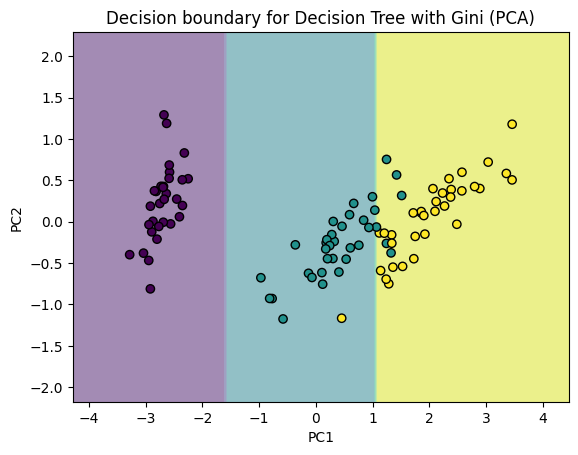

In [ ]:
pca = PCA(n_components=2) # 2 composantes principales pour un tracé 2D
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

pca_classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
pca_classifier.fit(X_train_pca, y_train)

disp = DecisionBoundaryDisplay.from_estimator(pca_classifier, X_train_pca, xlabel='PC1',
                                              ylabel='PC2', alpha=0.5)
disp.ax_.scatter(X_train_pca[:, 0], X_train_pca[:,
                 1], c=y_train, edgecolor="k")
plt.title("Decision boundary for Decision Tree with Gini (PCA)")
plt.show()

# References : 
1. https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial#13.-Decision-Tree-Classifier-with-criterion-gini-index-
2. https://scikit-learn.org/
3. https://www.datacamp.com/tutorial/machine-learning-in-r
4. https://www.datacamp.com/tutorial/decision-tree-classification-python 
5. https://www.tutorialexample.com/an-introduction-to-accuracy-precision-recall-f1-score-in-machine-learning-machine-learning-tutorial/

# Gini et Entropie dans les Arbres de Décision

Dans les arbres de décision, **Gini** et **Entropie** sont des métriques utilisées pour mesurer l'impureté (ou le désordre) d'un ensemble de données à un nœud donné. Elles aident l'algorithme à décider comment diviser les données.

---

## **1. Impureté de Gini**
- Mesure la probabilité qu'un élément choisi au hasard soit mal classé s'il est étiqueté selon la distribution des classes dans le nœud.
- Formule :
  $$
  Gini = 1 - \sum_{i=1}^{C} p_i^2
  $$
  où :
  -  $C$ est le nombre de classes,
  -  $p_i$ est la proportion de la classe $i$ dans le nœud.

- **Plage de valeurs** : 0 (nœud pur) à 0.5 (impureté maximale pour un problème binaire équilibré).
- **Exemple** :
  - Si un nœud contient 80 % de la classe A et 20 % de la classe B :
    $$
    Gini = 1 - (0.8^2 + 0.2^2) = 1 - (0.64 + 0.04) = 0.32
    $$

---

## **2. Entropie (Gain d'Information)**
- Mesure l'imprévisibilité de l'ensemble de données à un nœud, basé sur la théorie de l'information.
- Formule :
  $$
  Entropie = -\sum_{i=1}^{C} p_i \log_2 p_i
  $$
  où :
  -  $C$ est le nombre de classes,
  -  $p_i$ est la proportion de la classe $i$ dans le nœud.

- **Plage de valeurs** : 0 (nœud pur) à 1 (désordre maximal pour un problème binaire équilibré).
- **Exemple** :
  - Si un nœud contient 80 % de la classe A et 20 % de la classe B :
    $$
    Entropie = -(0.8 \log_2 0.8 + 0.2 \log_2 0.2)
    $$
    $$
    = -(0.8 \times -0.32 + 0.2 \times -2.32) = 0.72
    $$

---

## **Comparaison entre Gini et Entropie**

| Critère        | Impureté de Gini | Entropie |
|---------------|----------------|---------|
| **Concept**   | Mesure la probabilité de mauvaise classification | Mesure le désordre de l'information |
| **Calcul**    | Plus rapide (pas de logarithmes) | Plus lent (utilise des logarithmes) |
| **Préférence de division** | Privilégie une pureté de classe plus élevée | Favorise des divisions plus équilibrées (si proches) |
| **Impact sur les arbres de décision** | Peut conduire à des arbres légèrement différents | Peut produire des arbres plus profonds |

En pratique, **Gini est préféré dans les arbres CART (Classification and Regression Trees) car il est plus rapide à calculer**, tandis que **l'Entropie est utilisée dans ID3, C4.5 et d'autres algorithmes d'arbres de décision**. Toutefois, les résultats obtenus avec ces deux critères sont souvent similaires.